In [1]:
import sys
import pynnp
from generate_n2p2_input import read_state_output
from acsf_pca import acsf_vector
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
sys.path.append(["/home/ueda/n2p2-work", "/home/ueda/n2p2/src/pynnp"])

In [2]:
m = pynnp.Mode()
m.initialize()
m.loadSettingsFile("input.nn")
m.setupElementMap()
m.setupElements()
m.setupCutoff()
m.setupSymmetryFunctions()
m.setupSymmetryFunctionMemory()
m.setupSymmetryFunctionCache()
m.setupSymmetryFunctionGroups()
m.setupSymmetryFunctionScalingNone()


*******************************************************************************

WELCOME TO n²p², A SOFTWARE PACKAGE FOR NEURAL NETWORK POTENTIALS!
------------------------------------------------------------------

n²p² version  (from git): v2.1.4-9-g72f58c0
             (version.h): v2.1.4
------------------------------------------------------------
Git branch              : master
Git revision            : 72f58c07930ec3da0819c815575a74f12994f318
Compile date/time       : Jan 29 2022 19:43:30
------------------------------------------------------------

Features/Flags:
------------------------------------------------------------
Symmetry function groups     : enabled
Symmetry function cache      : enabled
Timing function available    : available
Asymmetric polynomial SFs    : available
SF low neighbor number check : enabled
SF derivative memory layout  : reduced
MPI explicitly disabled      : no
------------------------------------------------------------

Please cite the following

In [3]:
paths = ['./2022.01.30:00:14:38:Cu.out', './2022.01.31:12:34:02:Cu.out']
acsf_lst = []
for path in paths:
    structure, energy, forces = read_state_output(path)
    acsf_lst.append(acsf_vector(structure, energy, forces,m))
acsfs = np.array(acsf_lst)


   2 Cu  3  ct6 Cu Cu         *          *  6.000E+00                *    * 0.00     *    *    * *
   -  -  -    -  -  - 1.653E-02  0.000E+00          -               -1  1.0    -   172    1    9 1
   -  -  -    -  -  - 1.653E-02  0.000E+00          -                1  1.0    -   173    2   10 0
   -  -  -    -  -  - 1.653E-02  0.000E+00          -               -1  6.0    -   174    3   11 0
   -  -  -    -  -  - 1.653E-02  0.000E+00          -                1  6.0    -   175    4   12 0
   -  -  -    -  -  - 4.082E-02  0.000E+00          -               -1  1.0    -   168    5   13 1
   -  -  -    -  -  - 4.082E-02  0.000E+00          -                1  1.0    -   169    6   14 0
   -  -  -    -  -  - 4.082E-02  0.000E+00          -               -1  6.0    -   170    7   15 0
   -  -  -    -  -  - 4.082E-02  0.000E+00          -                1  6.0    -   171    8   16 0
   -  -  -    -  -  - 2.222E-01  0.000E+00          -               -1  1.0    -   164    9   17 1
   -  -  

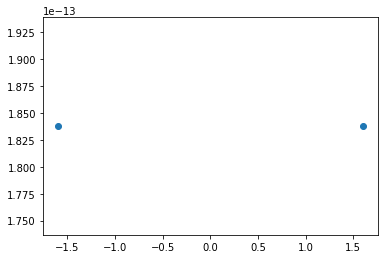

In [4]:
pca = PCA(n_components=2)
x_scpa = pca.fit_transform(acsfs)
plt.scatter(x_scpa[:,0],x_scpa[:,1])